# Linear Inequalities
## Finding an Optimal Marketing Channel Mix

In this problem, I am going to look at paid channels since they ahve a definite cost constraint. Here, we will look at the paid media sources: Facebook Ads (x), Bing Ads (y), and Google Ads (z). Historically, lead values for these channels have been approximately $35, $180, and $215, respectively. Within a given month we can spend up to 160 hours working on ads. It typically takes 0.25 hours of work for a Facebook lead, 0.015 hours for a Bing lead, and 0.01 hours for a Google lead. Facebook leads tend to cost $20/lead, Bing costs $180/lead, and Google costs $170/lead. Our current monthly budget is $120,000. Additionally, we need to keep a certain lead volume ever month to keep our Bing reps happy, so we try to have at least 1 Bing lead for every 10 Google leads. Below we will try to determine the optimal mix between the three channels.

In [36]:
# import libraries
import numpy as np
from scipy.optimize import linprog
import plotly.express as px
import matplotlib.pyplot as plt

In [2]:
# set bounds
x0_bound = (0, None)
x1_bound = (0, None)
x2_bound = (0, None)

In [3]:
# set the objective function (m = 35x + 180y + 215z)
c = [-35, -180, -215]

In [4]:
# set up the left hand side of the constraints
A = [
    ## spend constraint (20x + 150y + 170z <= 120,000)
    [20, 150, 170],
    ## time constraint (0.25x + 0.015y + 0.01z <= 160)
    [.25, .015, .01],
    ## 1 Bing lead for every 10 Google leads (y = 10x)
    [0, -10, 1]
]

In [5]:
# set up the right hand side of the constraints
b = [120000, 160, 10]

In [6]:
# run the optimization and print the results
reg = linprog(c, A, b, bounds=(x0_bound, x1_bound, x2_bound))
print(reg)

     con: array([], dtype=float64)
     fun: -157160.1499677584
 message: 'Optimization terminated successfully.'
     nit: 5
   slack: array([1.76661246e-01, 2.35747239e-04, 2.83084696e-05])
  status: 0
 success: True
       x: array([613.23355966,  57.31630106, 583.16298228])


In [19]:
facebook, bing, google = np.floor(reg.x)

In [31]:
revenue = np.sum([val * -1 for val in c ] * np.floor(reg.x))

In [34]:
print(f"For a max revenue of ${int(revenue)}, we should have {int(facebook)} Facebook leads, {int(bing)} Bing leads, and {int(google)} Google leads")

For a max revenue of $157060, we should have 613 Facebook leads, 57 Bing leads, and 583 Google leads


## Solving Graphically (With Corner Points)

Let's make a simplified version of the problem and solve it graphically, with corner points. In this version, we will look at paid social, `x`, (Facebook) and paid search, `y`, (Bing & Google). We will have a cost constraint (20x + 165y <= 120000) and a time constraint (0.25x + 0.1y <= 160).

In [39]:
x = np.arange(0, 1001, 1)
y1 = -(4/33) * x + (8000 / 11)
y2 = -(2.5) * x + 1600

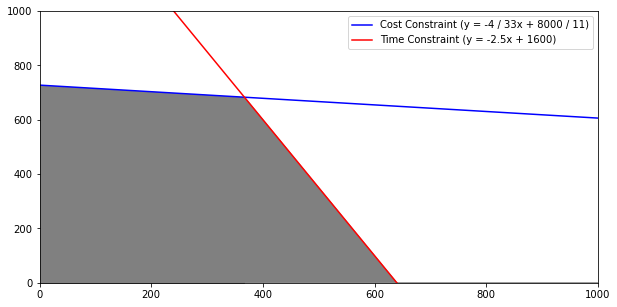

In [43]:
plt.figure(figsize=(10, 5))
plt.xlim(0, 1000)
plt.ylim(0, 1000)
plt.plot(x, y1, color='blue', label='Cost Constraint')
plt.plot(x, y2, color='red', label='Time Constraint')
plt.legend(['Cost Constraint (y = -4 / 33x + 8000 / 11)', 'Time Constraint (y = -2.5x + 1600)'], loc='best')
plt.fill_between(x, y2, where=(y2<=y1), color='gray')
plt.fill_between(x, y1, where=(y1 <= y2), color='gray')
plt.show()

In [44]:
x=[57600/157, 640, 0]
y = [107200/157, 0, 120000/165]
obj = np.matrix([20.0, 165.0])

In [45]:
obj = np.transpose(obj)
corners = np.matrix([x,y])
corners = np.transpose(corners)

In [46]:
results = np.dot(corners, obj)

In [49]:
print(f'Value of Objective Function at Each Corner Point: \n{results}')

Value of Objective Function at Each Corner Point: 
[[120000.]
 [ 12800.]
 [120000.]]


This gives me two corners with the same result of $120000. (57600/157, 107200/157) and (0, 120000/165). With the first point I would need 366 paid social leads and 682 paid search leads. With the second corner I would need 727 paid search leads.
By inspecting the graph, I can see that I hit the cost and time constraint on the first point and I hit a time constraint on the second point.